<a href="https://colab.research.google.com/github/dikshank/MRI_IMAGE_TRANSLATION_WITH_MLFLOW/blob/main/understanding_MRI_Image_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project, you will acting as a machine learning engineer or researcher at a healthcare company specializing in medical imaging applications. The team in which you are working want to perform the analysis of MRIs (Magnetic Resonance Images) of brain. An MRI system can create multiple types of images at one go but not all types of images are aquired in every single time,in every single scan. In short, MRI system gives us two types of images as output for every patient. One is called T1 weighted images and other one is called T2 weighted images. But in many scenarios, it can happen with people that they may lost one of those images given to them as their test report but the diagnostician requires both types of images to diagnose that what is going on with the patient inside his brain.

# In this project, we are assuming that patients might be having T1 weighted images with them in their test report images but they may lost the T2 weighted images. So, your task is to generate synthetic artificial T2 weighted images for them, given their respective T1 weighted images so that their test reports will be having both kind of images and hence it will be easier for the diagnostician to diagnose their disease. You will be using deep learning for this.



In [1]:
! pip install nibabel

# Make sure that nibabel library is installed. This library is used to read different types of images in medical domain in python. To know more about Nibabel library, goto the following link:

# https://nipy.org/nibabel/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# cd /content

# Make sure that you have already navigated to google drive because you will be unzipping lot of biomemdical images.

In [4]:
# ! unzip /content/drive/MyDrive/T1_and_T2_weighted_training_images.zip

# A medical image is read using nibabel library as shown below

In [5]:
import nibabel as nib
patient_t1_image =  nib.load("/content/drive/MyDrive/U_Net_For_MRI_IMAGES/T1_and_T2_weighted_training_images/t1/IXI131-HH-1527-T1_fcm.nii.gz")
patient_t1_image_data = patient_t1_image.get_fdata()

In [6]:
patient_t1_image_data.shape

(120, 120, 90)

# As it can be noticed that MR Images are far different than the usual colored or grayscale images. Colored images have three channels and grayscale images have only one channel whereas it can be clearly seen that the MR images here have 90 channels !!! Thats crazy. Therefore, one thing is for sure that definitely these images will comsume lot of memory and computation time when passed though a Convolutional Neural Network because their size (Height and Width) is also big as well as their number of channels are also a lot.

In [7]:
patient_t2_image = nib.load("/content/drive/MyDrive/U_Net_For_MRI_IMAGES/T1_and_T2_weighted_training_images/t2/IXI131-HH-1527-T2_reg_fcm.nii.gz")
patient_t2_image_data = patient_t2_image.get_fdata()

# Previously, T1 eighted image of one of the patients is read using nibabel library and here wera are reading T2 weighted image of the same patient using nibabel library.  

# Now, let's try to see that what is inside these two types of images for a single patient. But, all our eyes can see are colored images and we know that colored images have maximum 3 channels (R,G,B) or our eyes can see a grayscale (Black and White) image so it means that our eyes can see images which have maximum 3 channels but the medicalimages we have of brain have 90 channels !!! So, how do we visualize them ??  Well, what we are goiong to do is that we are going to randomly select 3 consecutive channels out of 90 channels and going to plot and see that what we can observe.

In [8]:
import matplotlib.pyplot as plt

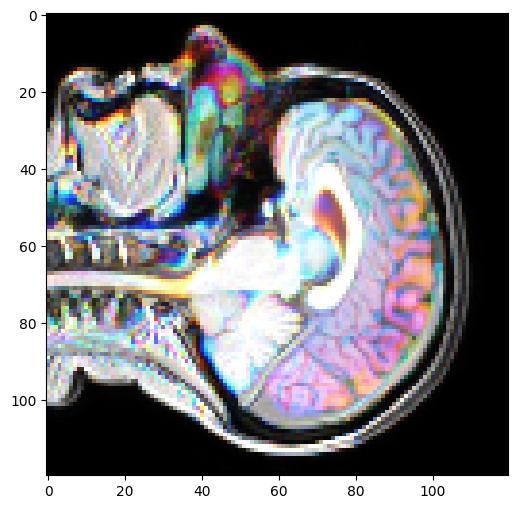

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(patient_t1_image_data[:,:,44:47])

# Above is the plot of randomly selected 3 channels of T1 weighted images and below is the plot of same 3 consecutive selected channels of T2 weighted image as T1 weighted image.

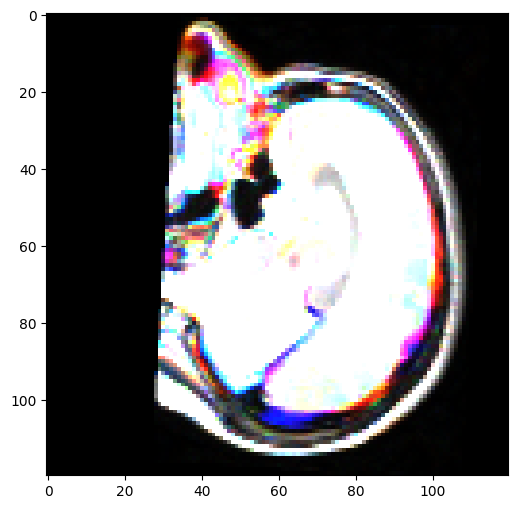

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(patient_t2_image_data[:,:,44:47])

# Now, the first thing which we have to do is to segregate our data into 3 parts : Training, Cross Validation and Testing. We already have all the images in a training folder, this means that we have to create two more folders for Cross Validation and Testing data and move some fixed fraction (Train: 70 %, Cross Validation: 20 % and Testing: 10 %) of both T1 and T2 weighted images to the respective folders.  

In [11]:
import os

In [12]:
# os.mkdir(path="T1_and_T2_wieghted_cv_images")
# os.mkdir(path="T1_and_T2_wieghted_test_images")

In [13]:
import shutil

In [14]:
# def move_files(dst,src,t1_files_to_move,t2_files_to_move):

#   os.mkdir(os.path.join(dst,"t1"))
#   os.mkdir(os.path.join(dst,"t2"))

#   t1_dst_path = os.path.join(dst,"t1")
#   t2_dst_path = os.path.join(dst,"t2")

#   t1_src_path = os.path.join(src,"t1")
#   t2_src_path = os.path.join(src,"t2")

#   for t1_filename,t2_filename in zip(t1_files_to_move,t2_files_to_move):

#     shutil.move(src=os.path.join(t1_src_path,t1_filename),dst=t1_dst_path)
#     shutil.move(src=os.path.join(t2_src_path,t2_filename),dst=t2_dst_path)

In [15]:
# t1_files_to_move = os.listdir("/content/drive/MyDrive/T1_and_T2_weighted_training_images/t1")
# t2_files_to_move = os.listdir("/content/drive/MyDrive/T1_and_T2_weighted_training_images/t2")

In [16]:
# t1_cv_files_to_move = t1_files_to_move[int(0.7*len(t1_files_to_move)):int(0.9*len(t1_files_to_move))]
# t2_cv_files_to_move = t2_files_to_move[int(0.7*len(t2_files_to_move)):int(0.9*len(t2_files_to_move))]

In [17]:
# t1_test_files_to_move = t1_files_to_move[int(0.9*len(t1_files_to_move)):len(t1_files_to_move)]
# t2_test_files_to_move = t2_files_to_move[int(0.9*len(t2_files_to_move)):len(t2_files_to_move)]

In [18]:
# move_files(dst="/content/drive/MyDrive/T1_and_T2_wieghted_cv_images",
#            src="/content/drive/MyDrive/T1_and_T2_weighted_training_images",t1_files_to_move=t1_cv_files_to_move,
#            t2_files_to_move=t2_cv_files_to_move)

In [19]:
# move_files(dst="/content/drive/MyDrive/T1_and_T2_wieghted_test_images",
#            src="/content/drive/MyDrive/T1_and_T2_weighted_training_images",t1_files_to_move=t1_test_files_to_move,
#            t2_files_to_move=t2_test_files_to_move)

In [20]:
from PIL import Image
import numpy as np

# Now that we have segregated our T1 and T2 weighted images into three respective categories, we have to now write the function for our custom data generator. Some important points to keep in mind while creauting our custom image data generator.

# First of all, the training data is very less and in such kind of situation, if we are going to train a network to translate T1 to T2 weighted images then it will overfit because the number of parameters in a neural network will be lot more in comparison to the number of training images as well as their pixels. So, network will be more complex and hence for sure overfitting will happen.

# So, we need to increase our training data. Now, we have to two ways to increase our training data, the first is to perform data rugmentation by rotating, horizontally shifting, vertically shifting both T1 and T2 weighted images.

# The second thing which we should definitely do is to take random crops from our single image (both T1 and T2) of shape (120,120,90). But we need to fix on the size of the random crop which we are going to take from each image. And we will be feeding that into our CNN. But the question arrises is that why we need to perform random cropping of fixed size and insert it into a CNN, why not insert the whole image because we have to translate the whole image and not the part of it, right ? Well, it doesn't matters because uptimately the network is going to learn the parametrs in the same way as it will learn for the whole image but random cropping is going to be advantageous in two ways. First iof all our training data will increase because for each image in each epoch we can take a different random crop with a different set of consecutive channels as well as different set of pixels located in different locations and at the same time our cropped image will be smaller in size in comparison to the whole image and hence less memory will be consumed as well as less comutation time will be reuiqred and durig the inference time, we can always merge the copped portions to get the whole T2 translated image.

# Therefore, you have to write a function for our custom data generator such that for every spoch, our custom data generator will perform the random crop on both T1 and T2 weighted images on the same spatial locations as well as same consecutive channels and return the batch of them so that we can feed that batch to the network.

In [21]:
import numpy as np
import nibabel as nib
import os

def data_generator(base_path, t1_images, t2_images, crop_size, batch_size=6):

    num_images = len(t1_images)
    crop_height, crop_width, crop_depth = crop_size

    # Create index array for shuffling
    indices = np.arange(num_images)

    while True:
        np.random.shuffle(indices)  # Shuffle the indices for each epoch

        for offset in range(0, num_images, batch_size):
            batch_indices = indices[offset:offset + batch_size]

            t1_cropped_images_batch = []
            t2_cropped_images_batch = []

            for idx in batch_indices:
                t1_img, t2_img = t1_images[idx], t2_images[idx]

                try:
                    # Load and preprocess images
                    t1_image = nib.load(os.path.join(base_path, "t1", t1_img)).get_fdata()
                    t2_image = nib.load(os.path.join(base_path, "t2", t2_img)).get_fdata()

                    # Normalize images
                    t1_image = (t1_image - np.mean(t1_image)) / np.std(t1_image)
                    t2_image = (t2_image - np.mean(t2_image)) / np.std(t2_image)

                    # Random cropping
                    x = np.random.randint(0, t1_image.shape[0] - crop_height)
                    y = np.random.randint(0, t1_image.shape[1] - crop_width)
                    z = np.random.randint(0, t1_image.shape[2] - crop_depth)

                    t1_cropped_image = t1_image[x:x+crop_height, y:y+crop_width, z:z+crop_depth]
                    t2_cropped_image = t2_image[x:x+crop_height, y:y+crop_width, z:z+crop_depth]

                    # Add data augmentation here if needed

                    t1_cropped_images_batch.append(t1_cropped_image[..., np.newaxis])
                    t2_cropped_images_batch.append(t2_cropped_image[..., np.newaxis])

                except Exception as e:
                    print(f"Error processing image {t1_img} or {t2_img}: {str(e)}")
                    continue

            if t1_cropped_images_batch and t2_cropped_images_batch:
                yield np.array(t1_cropped_images_batch), np.array(t2_cropped_images_batch)


In [22]:
# import tensorflow as tf
# import nibabel as nib
# import os
# import numpy as np

# def data_generator(base_path, t1_images, t2_images, crop_size, batch_size=6):
#     t1_images = np.array(t1_images)
#     t2_images = np.array(t2_images)
#     num_images = len(t1_images)
#     crop_height, crop_width, crop_depth = crop_size

#     t1_images_path = os.path.join(base_path, "t1")
#     t2_images_path = os.path.join(base_path, "t2")

#     def load_and_preprocess(t1_img, t2_img):
#         t1_image = nib.load(os.path.join(t1_images_path, t1_img)).get_fdata()
#         t2_image = nib.load(os.path.join(t2_images_path, t2_img)).get_fdata()

#         # Normalize images to [0, 1] range
#         t1_image = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())
#         t2_image = (t2_image - t2_image.min()) / (t2_image.max() - t2_image.min())

#         t1_image_height, t1_image_width, t1_image_depth = t1_image.shape
#         t2_image_height, t2_image_width, t2_image_depth = t2_image.shape

#         # Adaptive crop size based on intensity values
#         t1_mask = np.where(t1_image > np.percentile(t1_image, 10))  # Use 10th percentile as threshold
#         t1_mask_coords = np.array(t1_mask).T
#         min_coords = np.min(t1_mask_coords, axis=0)
#         max_coords = np.max(t1_mask_coords, axis=0)
#         crop_height = max_coords[0] - min_coords[0] + 1
#         crop_width = max_coords[1] - min_coords[1] + 1
#         crop_depth = max_coords[2] - min_coords[2] + 1

#         # Random cropping
#         start_h = np.random.randint(0, t1_image_height - crop_height + 1)
#         start_w = np.random.randint(0, t1_image_width - crop_width + 1)
#         start_d = np.random.randint(0, t1_image_depth - crop_depth + 1)

#         t1_cropped_image = t1_image[start_h:start_h + crop_height,
#                             start_w:start_w + crop_width,
#                             start_d:start_d + crop_depth]

#         t2_cropped_image = t2_image[start_h:start_h + crop_height,
#                             start_w:start_w + crop_width,
#                             start_d:start_d + crop_depth]

#         # Data augmentation
#         if np.random.uniform() < 0.5:
#             t1_cropped_image = np.flip(t1_cropped_image, axis=np.random.randint(0, 3))
#             t2_cropped_image = np.flip(t2_cropped_image, axis=np.random.randint(0, 3))

#         return t1_cropped_image[..., np.newaxis], t2_cropped_image[..., np.newaxis]

#     dataset = tf.data.Dataset.from_tensor_slices((t1_images, t2_images))
#     dataset = dataset.shuffle(buffer_size=num_images, reshuffle_each_iteration=True)
#     dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.prefetch(tf.data.AUTOTUNE)

#     return dataset

In [23]:
from keras.layers import Conv3D, Conv3DTranspose, BatchNormalization, MaxPooling3D
from keras.models import Sequential
from keras.layers import Input, UpSampling3D, UpSampling2D
from keras.layers import ReLU, Concatenate
from keras.layers import Reshape
import tensorflow as tf
import keras
from keras.models import Model

# Please download the research paper of U-net from the following link and follow the complete architecture and implement it inside the the below mentioned function:

# https://arxiv.org/abs/1505.04597

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Concatenate, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def unet_generator(input_shape, output_channels=1, dropout_rate=0.2, l2_reg=1e-4):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
    drop1 = Dropout(dropout_rate)(pool1)

    conv2 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(drop1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    drop2 = Dropout(dropout_rate)(pool2)

    conv3 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(drop2)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
    drop3 = Dropout(dropout_rate)(pool3)

    conv4 = Conv3D(512, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(drop3)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv3D(512, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(dropout_rate)(conv4)

    # Decoder
    up5 = UpSampling3D(size=(2, 2, 2))(drop4)
    up5 = Concatenate(axis=4)([up5, conv3])
    conv5 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up5)
    conv5 = BatchNormalization()(conv5)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(dropout_rate)(conv5)

    up6 = UpSampling3D(size=(2, 2, 2))(drop5)
    up6 = Concatenate(axis=4)([up6, conv2])
    conv6 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU()(conv6)
    drop6 = Dropout(dropout_rate)(conv6)

    up7 = UpSampling3D(size=(2, 2, 2))(drop6)
    up7 = Concatenate(axis=4)([up7, conv1])
    conv7 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = LeakyReLU()(conv7)
    drop7 = Dropout(dropout_rate)(conv7)

    # Output
    outputs = Conv3D(output_channels, 1, activation='sigmoid')(drop7)

    model = Model(inputs=[inputs], outputs=[outputs], name='UNet_Generator')
    return model


In [25]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Concatenate, Dropout, LeakyReLU, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2

# def unet_generator(input_shape, output_channels=1, dropout_rate=0.2, l2_reg=1e-4):
#     # VGG16 Encoder
#     vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
#     vgg16_encoder = Model(inputs=vgg16_base.input, outputs=vgg16_base.get_layer('block4_pool').output)

#     vgg16_encoder.trainable = False

#     encoder_output = vgg16_encoder.output

#     # Decoder
#     up6 = UpSampling3D(size=(2, 2, 2))(encoder_output)
#     up6 = Concatenate(axis=4)([up6, encoder_output])
#     conv6 = Conv3D(512, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up6)
#     conv6 = BatchNormalization()(conv6)
#     conv6 = LeakyReLU()(conv6)
#     conv6 = Conv3D(512, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv6)
#     conv6 = BatchNormalization()(conv6)
#     conv6 = LeakyReLU()(conv6)
#     drop6 = Dropout(dropout_rate)(conv6)

#     up7 = UpSampling3D(size=(2, 2, 2))(drop6)
#     up7 = Concatenate(axis=4)([up7, encoder_output])
#     conv7 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up7)
#     conv7 = BatchNormalization()(conv7)
#     conv7 = LeakyReLU()(conv7)
#     conv7 = Conv3D(256, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv7)
#     conv7 = BatchNormalization()(conv7)
#     conv7 = LeakyReLU()(conv7)
#     drop7 = Dropout(dropout_rate)(conv7)

#     up8 = UpSampling3D(size=(2, 2, 2))(drop7)
#     up8 = Concatenate(axis=4)([up8, encoder_output])
#     conv8 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up8)
#     conv8 = BatchNormalization()(conv8)
#     conv8 = LeakyReLU()(conv8)
#     conv8 = Conv3D(128, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv8)
#     conv8 = BatchNormalization()(conv8)
#     conv8 = LeakyReLU()(conv8)
#     drop8 = Dropout(dropout_rate)(conv8)

#     up9 = UpSampling3D(size=(2, 2, 2))(drop8)
#     up9 = Concatenate(axis=4)([up9, encoder_output])
#     conv9 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(up9)
#     conv9 = BatchNormalization()(conv9)
#     conv9 = LeakyReLU()(conv9)
#     conv9 = Conv3D(64, 3, activation=None, padding='same', kernel_regularizer=l2(l2_reg))(conv9)
#     conv9 = BatchNormalization()(conv9)
#     conv9 = LeakyReLU()(conv9)
#     drop9 = Dropout(dropout_rate)(conv9)

#     # Output
#     outputs = Conv3D(output_channels, 1, activation='sigmoid')(drop9)

#     model = Model(inputs=vgg16_encoder.input, outputs=outputs, name='UNet_VGG16_Generator')

#     return model


# Loss function for the U-net will be smooth L1 loss or you can say that smooth MAE loss.

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
import numpy as np

In [ ]:
!pip install mlflow --quiet

In [41]:
def mse_loss(t2_images_true, t2_images_pred):
    mse = tf.reduce_mean(tf.keras.losses.mean_squared_error(y_true=t2_images_true, y_pred=t2_images_pred))
    return mse

**Peak Signal-to-Noise Ratio (PSNR):** PSNR is a commonly used metric for evaluating the quality of reconstructed or generated images. It measures the ratio between the maximum possible pixel value and the amount of distortion or error in the generated image compared to the ground truth. Higher PSNR values indicate better image quality and lower reconstruction error.

In [40]:
def psnr(y_true, y_pred):
    max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    psnr_val = 20.0 * tf.math.log(max_pixel / tf.sqrt(mse)) / tf.math.log(10.0)
    return psnr_val

**Structural Similarity Index (SSIM):** SSIM is another widely used metric for evaluating the structural similarity between the generated and ground truth images. It considers luminance, contrast, and structural characteristics, making it particularly suitable for evaluating medical images where preserving structural details is crucial. Higher SSIM values (closer to 1) indicate better structural preservation and image quality.

In [ ]:
def ssim(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

In [ ]:
crop_size = (64, 64, 16)
regression_unet = unet_generator(input_shape=crop_size + (1,))
img_translation_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


# Compile your model with custom loss and metrics
regression_unet.compile(optimizer=img_translation_optimizer, loss=mse_loss, metrics=[psnr, ssim])

In [ ]:
# we don't need it beacause we are using mlflow, unless we want to pause and continue the training due to resource limitations
img_translation_checkpoint_dir = "/content/drive/MyDrive/img_translation_checkpoints"
checkpoint_prefix = os.path.join(img_translation_checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=img_translation_optimizer, model=regression_unet)

In [ ]:
regression_unet.summary()

In [ ]:
tf.keras.utils.plot_model(model=regression_unet,show_shapes=True)

In [ ]:
epochs = 5
train_batch_size = 6
cv_batch_size = 5
checkpoint_frequency = 10  # Adjust as needed
train_base_path = "/content/drive/MyDrive/U_Net_For_MRI_IMAGES/T1_and_T2_weighted_training_images"
cv_base_path = "/content/drive/MyDrive/U_Net_For_MRI_IMAGES/T1_and_T2_weighted_cv_images"


# Assuming you have defined your data generators train_datagen and cv_datagen    \
t1_train_images = os.listdir(os.path.join(train_base_path, "t1"))
t2_train_images = os.listdir(os.path.join(train_base_path, "t2"))
t1_cv_images = os.listdir(os.path.join(cv_base_path, "t1"))
t2_cv_images = os.listdir(os.path.join(cv_base_path, "t2"))

In [ ]:
import tensorflow as tf
import os
import mlflow
import mlflow


cv_datagen = data_generator(base_path=cv_base_path, t1_images=t1_cv_images, t2_images=t2_cv_images,
                            crop_size=crop_size, batch_size=cv_batch_size)

train_datagen = data_generator(base_path=train_base_path, t1_images=t1_train_images, t2_images=t2_train_images,
                                crop_size=crop_size, batch_size=train_batch_size)

steps_per_epoch=len(t1_train_images) // train_batch_size
validation_steps=len(t1_cv_images) // cv_batch_size

In [28]:
local_registry = "sqlite:///mlruns.db"
print(f"Running local model registry={local_registry}")
# Set MLflow tracking URI to your custom URI, instead of this dagshub can also be used
mlflow.set_tracking_uri(local_registry)

mlflow.set_experiment("UNet MRI Translation training 01")
# Start MLflow run
with mlflow.start_run():

    # Log parameters
    mlflow.log_param("optimizer", "img_translation_optimizer")
    mlflow.log_param("loss_function", "mse_loss")
    mlflow.log_metric("epochs", epochs)

    t1_eval_images, t2_eval_images = next(train_datagen)
    signature = mlflow.models.infer_signature(t1_eval_images, t2_eval_images)

    # Log model architecture
    mlflow.keras.log_model(regression_unet, "regression_unet_model", , signature=signature)

    # Train the model
    history = regression_unet.fit(train_datagen,
                                  steps_per_epoch=steps_per_epoch,
                                  epochs=epochs,
                                  validation_data=cv_datagen,
                                  validation_steps=validation_steps)

    # Log metrics
    mlflow.log_metrics({"psnr": history.history['psnr'][-1], "ssim": history.history['ssim'][-1]})

    # Save the model
    regression_unet.save("regression_unet.keras")

    # Log the saved model
    mlflow.log_artifact("regression_unet.keras", "models")


Running local model registry=sqlite:///mlruns.db


2024/03/25 19:38:43 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/03/25 19:38:43 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

Epoch 1/5
3/3 [==============================] - 45s 13s/step - loss: 1.7881 - psnr: -1.7819 - ssim: -0.0045 - val_loss: 1.6617 - val_psnr: -1.4422 - val_ssim: -0.1300
Epoch 2/5
3/3 [==============================] - 4s 878ms/step - loss: 1.5904 - psnr: -1.1654 - ssim: 0.0055 - val_loss: 1.5662 - val_psnr: -1.1337 - val_ssim: -0.1576
Epoch 3/5
3/3 [==============================] - 2s 853ms/step - loss: 1.2723 - psnr: 0.2976 - ssim: -0.0177 - val_loss: 1.6721 - val_psnr: -1.4743 - val_ssim: -0.0413
Epoch 4/5
3/3 [==============================] - 2s 939ms/step - loss: 1.6834 - psnr: -1.6147 - ssim: 0.0040 - val_loss: 1.2659 - val_psnr: 0.0086 - val_ssim: -0.0546
Epoch 5/5
3/3 [==============================] - 2s 910ms/step - loss: 1.4992 - psnr: -0.8919 - ssim: 0.0177 - val_loss: 1.5859 - val_psnr: -1.1995 - val_ssim: -0.0473


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --backend-store-uri sqlite:///mlruns.db --port 5000 &")# run tracking UI in the background

In [39]:
from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://e1d4-34-147-63-208.ngrok-free.app


# After training is over, lt's try to visualize the translated output of the network for a random cropped cross validation T1 weighted image.

In [ ]:
test_base_path = "/content/drive/MyDrive/U_Net_For_MRI_IMAGES/T1_and_T2_weighted_test_images"
t1_test_images = os.listdir(os.path.join(test_base_path,"t1"))
t2_test_images = os.listdir(os.path.join(test_base_path,"t2"))

test_datagen = data_generator(base_path=test_base_path,t1_images=t1_test_images,t2_images=t2_test_images,
                              crop_size=crop_size,batch_size=3)

In [ ]:
t1_test_images_batch,t2_test_images_batch = next(test_datagen)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
regression_unet = load_model("/content/mlruns/1/53a598c8540b4e5cac565a4c9e040792/artifacts/models/regression_unet.h5")

In [ ]:
t2_test_images_batch_pred = regression_unet(t1_test_images_batch,training=False)

In [ ]:
t2_test_images_batch_pred = t2_test_images_batch_pred.numpy()

In [ ]:
t2_test_single_image = t2_test_images_batch_pred[0].reshape(64,64,16)

# Below is the translated synthetic version of random cropped T1 weighted image from Cross Validation data (Synthetic T2 weighted cropped image) generated by the network.  

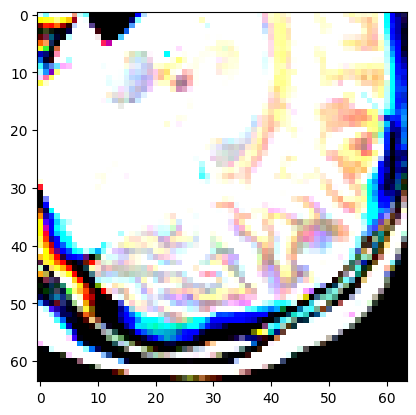

In [ ]:
plt.imshow(t2_test_single_image[:,:,10:13])

In [ ]:
t2_test_single_image = t2_test_images_batch[0].reshape(64,64,16)

# Below is the actual T2 weighted cropped image from the cross validation data. As, it can be observed that our network has become successful in generating synthetic translated images similar to actual T2 weighted cropped images.

In [ ]:
t2_test_single_image.shape

(64, 64, 16)

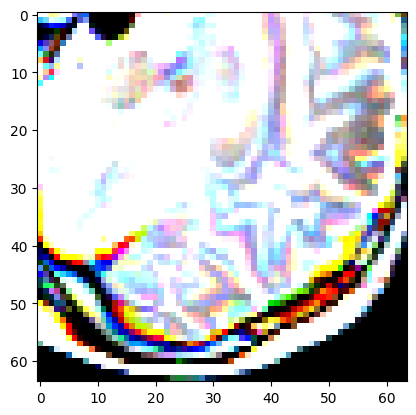

In [ ]:
plt.imshow(t2_test_single_image[:,:,5:8])

pretty nice for a 21 image training data!